#### SUELDO POR INFLACIÓN ACUMULADA
* Determinación de sueldo mes a mes por inflación
* Calculo de bruto a neto 
* Calculo de aguinaldo


##### 1) Inflación acumuladas:

In [2]:
tasas_inflacion = [6.0, 6.6, 7.7, 8.4, 7.8, 6.0, 6.3, 12.4, 12.7]

# Convertir las tasas de porcentaje a decimales
tasas_decimales = [tasa / 100 for tasa in tasas_inflacion]

# Calcular la inflación acumulada
inflacion_acumulada = 1
for tasa in tasas_decimales:
    inflacion_acumulada *= (1 + tasa)

inflacion_acumulada -= 1

inflacion_acumulada_porcentaje = inflacion_acumulada * 100

display(f'La inflación acumulada es: {inflacion_acumulada_porcentaje:.2f}%')

'La inflación acumulada es: 102.98%'

#### 2) Sueldo por inflación acumulada

In [5]:
def calcular_sueldo_ajustado(sueldo_inicial, tasas_inflacion):
    sueldo_ajustado = sueldo_inicial
    
    for tasa in tasas_inflacion:
        sueldo_ajustado *= (1 + tasa)
    
    return sueldo_ajustado

sueldo_inicial = float(input("Ingrese el sueldo inicial: "))

tasas_inflacion = [6.0, 
                   6.6, 
                   7.7, 
                   8.4, 
                   7.8, 
                   6.0, 
                   6.3, 
                   12.4, 
                   12.7]

# meses = ['enero',
         'febrero',
         'marzo',
         'abril',
         'mayo',
         'junio',
         'julio',
         'agosto',
         'septiembre',
         'octubre',
         'noviembre',
         'diciembre']

sueldo_ajustado = calcular_sueldo_ajustado(sueldo_inicial, [tasa / 100 for tasa in tasas_inflacion])

print(f"El sueldo ajustado es: ${sueldo_ajustado:.2f}")

El sueldo ajustado es: $608944.101545


#### 3) Sueldo mes a mes por inflación acumulada

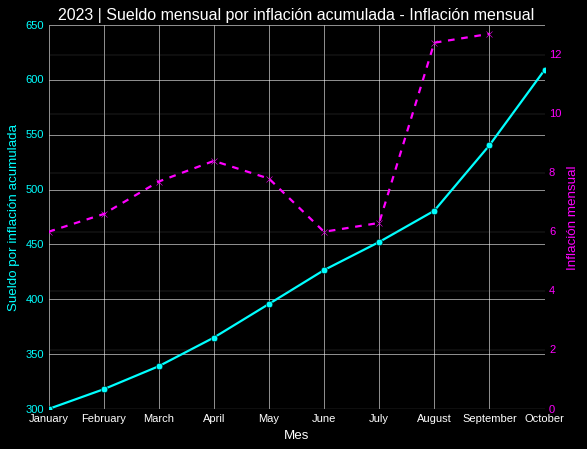

In [51]:
import matplotlib.pyplot as plt
import calendar

def calcular_sueldos_mensuales(sueldo_inicial, tasas_inflacion):
    sueldos_mensuales = [sueldo_inicial]
    
    for tasa in tasas_inflacion:
        sueldo_inicial *= (1 + tasa)
        sueldos_mensuales.append(sueldo_inicial)
    
    return sueldos_mensuales

sueldo_inicial = float(input("Ingrese el sueldo inicial: "))
tasas_inflacion = [6.0, 6.6, 7.7, 8.4, 7.8, 6.0, 6.3, 12.4, 12.7]
meses = list(calendar.month_name)[1:len(sueldos_mes_a_mes)+1]
sueldos_mes_a_mes = calcular_sueldos_mensuales(sueldo_inicial, [tasa / 100 for tasa in tasas_inflacion])

# Configurar el estilo
plt.style.use('dark_background')
plt.rcParams['lines.linewidth'] = 2

# Crear el gráfico
fig, ax1 = plt.subplots()

# Graficar sueldo ajustado en el eje y1
color = 'cyan'
ax1.set_xlabel('Mes')
ax1.set_ylabel('Sueldo por inflación acumulada', color=color)
ax1.plot(meses, sueldos_mes_a_mes, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Crear el segundo eje y para graficar inflación
ax2 = ax1.twinx()
color = 'magenta'
ax2.set_ylabel('Inflación mensual', color=color)
ax2.plot(tasas_inflacion, marker='x', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Establecer el límite inferior del segundo eje y en 0
ax2.set_ylim(bottom=0)

# Configuración para la cuadrícula en el segundo eje
ax2.grid(color='gray', linestyle='-', linewidth=0.2)

# Mostrar el gráfico
plt.title('2023 | Sueldo mensual por inflación acumulada - Inflación mensual')
plt.show()



/tmp/ipykernel_606143/2528486082.py:42: UserWarning:

You passed a edgecolor/edgecolors ((1, 1, 1)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



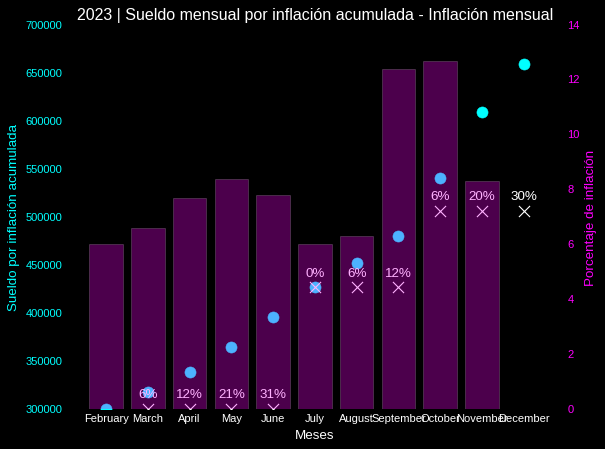

In [102]:
import matplotlib.pyplot as plt
import calendar

def calcular_sueldos_mensuales(sueldo_inicial, tasas_inflacion):
    sueldos_mensuales = [sueldo_inicial]
    
    for tasa in tasas_inflacion:
        sueldo_inicial *= (1 + tasa)
        sueldos_mensuales.append(sueldo_inicial)
    
    return sueldos_mensuales

# Datos
sueldo_inicial = float(input("Ingrese el sueldo inicial: "))
tasas_inflacion = [6.0, 6.6, 7.7, 8.4, 7.8, 6.0, 6.3, 12.4, 12.7, 8.3]
sueldos_reales = [0, 300000, 300000, 300000, 300000, 426600, 426600, 426600, 506552, 506552, 506552]
sueldos_mes_a_mes = calcular_sueldos_mensuales(sueldo_inicial, 
                                               [tasa / 100 for tasa in tasas_inflacion])
meses = list(calendar.month_name)[2:len(sueldos_mes_a_mes)+2]  # Iniciar desde febrero

# Calcular la diferencia porcentual entre sueldos_mes_a_mes y sueldo real
diferencia_porcentual = [(a - b) / b * 100 if b != 0 else 0 for a, b in zip(sueldos_mes_a_mes, sueldos_reales)]

##################################
# Crear la figura y los ejes
fig, ax1 = plt.subplots()
tasas_inflacion.append(0.0)

# Configurar el eje y para el scatter plot (sueldos_mes_a_mes)
color_ax1 = 'cyan'
scatter1 = ax1.scatter(meses, sueldos_mes_a_mes, s=100, color=color_ax1)
ax1.set_xlabel('Meses')
ax1.set_ylabel('Sueldo por inflación acumulada', 
               color=color_ax1)
ax1.tick_params('y', colors=color_ax1)

# Configurar límite inferior del eje y para que inicie en sueldo_inicial
ax1.set_ylim(bottom=sueldo_inicial)

color_blanco = (1, 1, 1)

scatter2 = ax1.scatter(meses, sueldos_reales, s=100, marker='x', 
                       color='white', edgecolor=color_blanco, 
                       linewidth=1, label='Sueldo Real')

# Agregar diferencia porcentual como texto en el gráfico (sin decimales)
for i, txt in enumerate(diferencia_porcentual):
    ax1.annotate(f'{int(txt)}%', (meses[i], sueldos_reales[i]), 
                 textcoords="offset points", xytext=(0,10), 
                 ha='center', fontsize=12, color=color_blanco)

# Desactivar la grilla para ax1
ax1.grid(False)

# Crear un segundo eje y para el gráfico de barras (tasas_inflacion)
ax2 = ax1.twinx()
color_ax2 = 'magenta'
ax2.bar(meses, tasas_inflacion, alpha=0.3, 
        color=color_ax2)
ax2.set_ylabel('Porcentaje de inflación', color=color_ax2)
ax2.tick_params('y', colors=color_ax2)
 
# Desactivar la grilla para ax2
ax2.grid(False)

# # Mostrar la leyenda
# fig.tight_layout()
# fig.legend(handles=[scatter1, scatter2], loc='upper left')

# Mostrar el gráfico
plt.title('2023 | Sueldo mensual por inflación acumulada - Inflación mensual')
plt.show()